# Quickstart

We begin with a straightforward example: decomposing the temperature over North America using tutorial data provided by ``xarray``.

In [2]:
import xarray as xr
import xeofs as xe


t2m = xr.tutorial.open_dataset('air_temperature')
t2m

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Our first step is to use standard EOF analysis in S-mode, as this is the most commonly employed variant of EOF analysis. If you're unfamiliar with the distinction between S-mode and T-mode, the article by [Compagnucci & Richmann (2007)](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/joc.1574) provides an excecllent summary.

To conduct EOF analysis, we first establish an `EOF` instance by determining the model parameters. For this example, we are interested in the first 15 modes using a non-standardized EOF analysis (based on the covariance matrix) without any weighting. Subsequently, we fit the data, specifying the sample dimensions.

In [3]:
model = xe.models.EOF(n_modes=10)
model.fit(t2m, dim='time')

After completing these steps, we can examine the fraction of variance explained by each mode:

In [5]:
model.explained_variance_ratio()

<xarray.DataArray 'explained_variance_ratio' (mode: 10)>
array([0.7968352 , 0.02702056, 0.02226538, 0.0163209 , 0.01500371,
       0.01136572, 0.01082397, 0.00727871, 0.00684999, 0.00615871],
      dtype=float32)
Coordinates:
  * mode     (mode) int64 1 2 3 4 5 6 7 8 9 10
Attributes:
    model:        EOF analysis
    n_modes:      10
    standardize:  False
    use_coslat:   False
    use_weights:  False
    software:     xeofs
    version:      1.0.2
    date:         2023-07-30 12:56:09

Now, let's retrieve the components, the eigenvectors of the covariance matrix. In climate science, they are often just called the *EOFs*.

In [6]:
components = model.components()

It's important to note that since we utilized `xr.Dataset` as our data input, the components will also be represented as an `xr.Dataset`.

To better understand them, we can visualize these components using the built-in plot method of `xarray`:

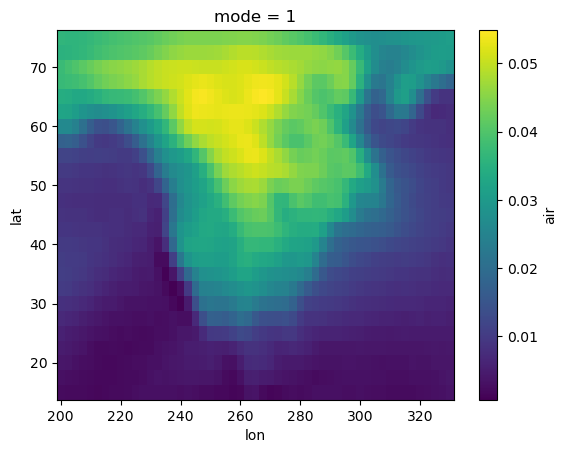

In [7]:
components['air'].sel(mode=1).plot()

In a similar fashion, we can also retrieve and examine the scores, i.e. the projection of the original data onto the eigenvectors. In climate science they are often referred to as Principal Components (PCs). The PCs are always in form of a `xr.DataArray`.

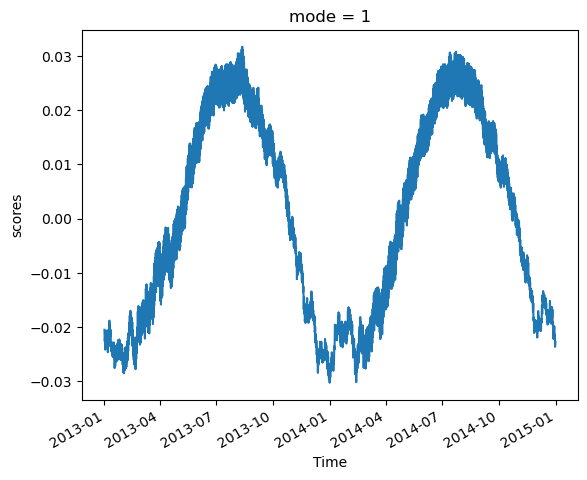

In [8]:
scores = model.scores()
scores.sel(mode=1).plot()